In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
from io import StringIO
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load the heart disease dataset

df = pd.read_csv("hp.csv")


In [3]:
#columns name
df.columns


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


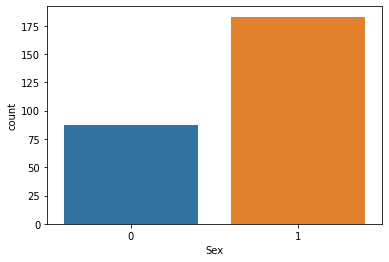

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


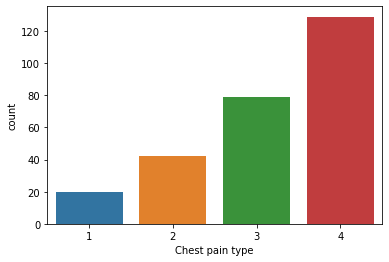

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


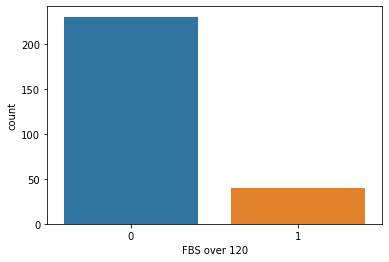

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


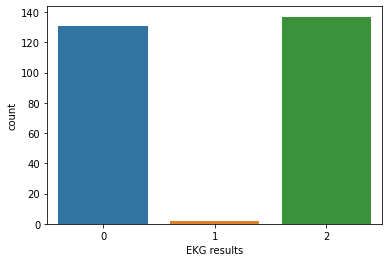

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


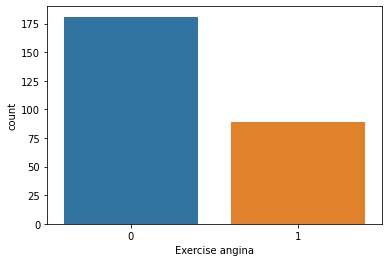

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


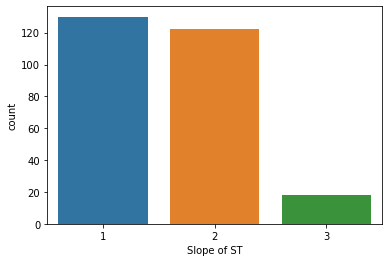

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


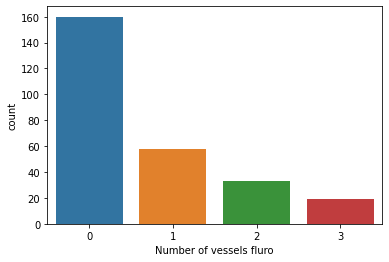

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


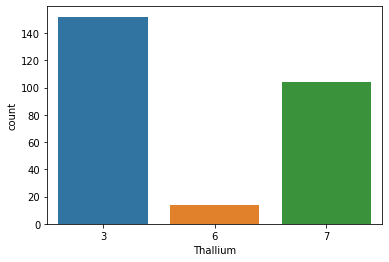

C:\Users\joshua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


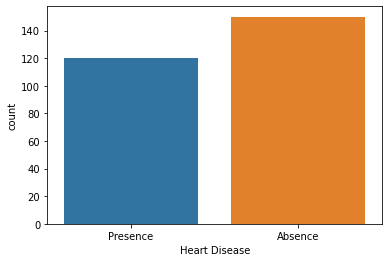

In [4]:
#visualization columns in bar plot
col=['Sex', 'Chest pain type','FBS over 120','EKG results','Exercise angina','Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

for col in col:
    sns.countplot(df[col])
    plt.show()

<AxesSubplot:>

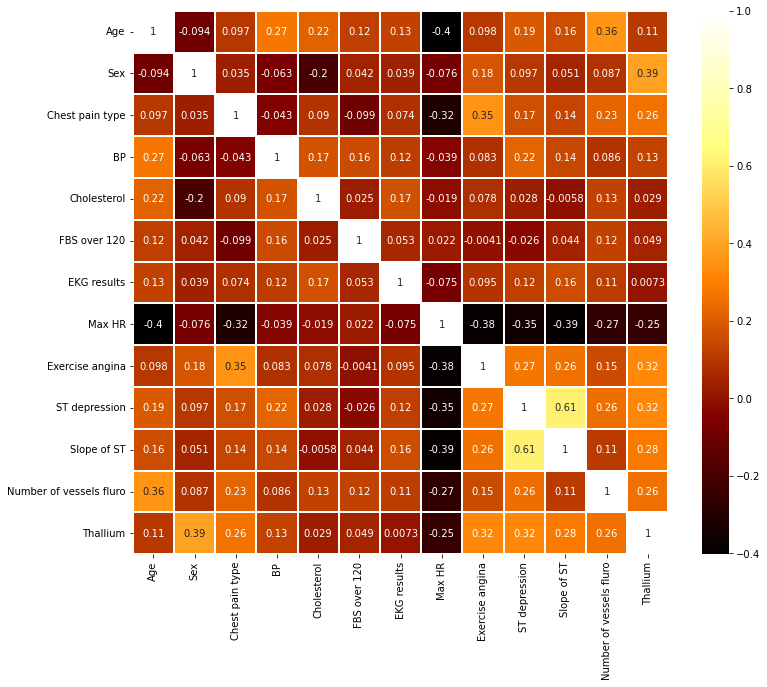

In [7]:
#heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths= 0.2, linecolor= 'white', cmap = 'afmhot')

In [36]:
# Data Cleaning and Preprocessing

df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120','EKG results', 'Max HR', 'Exercise angina', 'ST depression','Slope of ST', 'Number of vessels fluro', 'Thallium'])




In [37]:

# Feature Selection
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X, y)
X = selector.transform(X)


In [38]:
# Model Training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_convert = {"Absence":0,"Presence":1}
y_train = y_train.replace(train_convert)

test_convert = {"Absence":0,"Presence":1}
y_test = y_test.replace(test_convert)

ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [39]:
# Feature Selection

X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X, y)
X = selector.transform(X)



In [40]:
# Create a new dataframe with only the selected features and their names

feature_names = df.columns.drop("Heart Disease")[selector.get_support()]
X_df = pd.DataFrame(X, columns=feature_names)

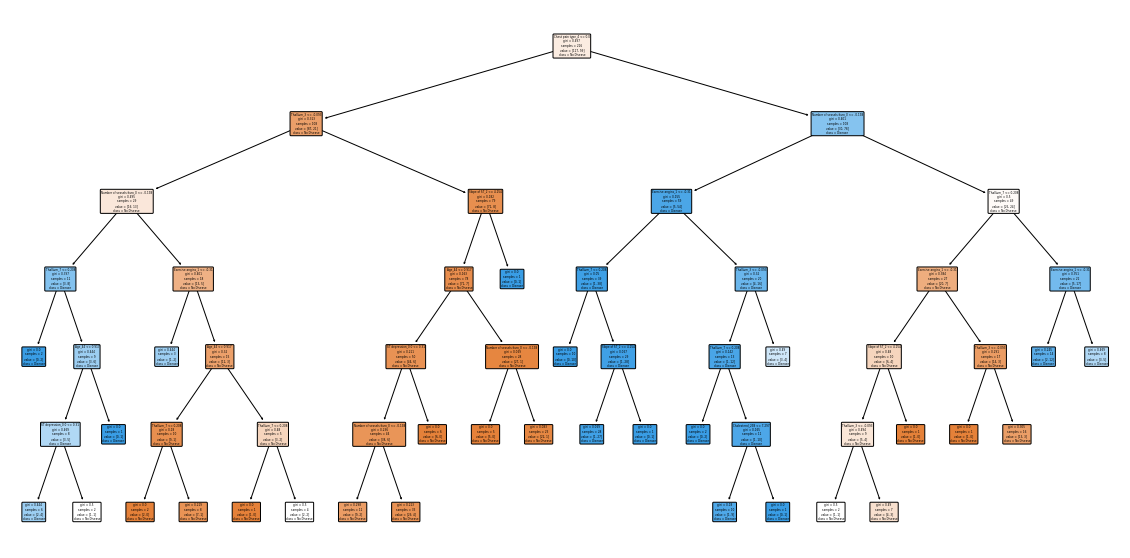

In [41]:
# visualize 

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True,
                feature_names=X_df.columns, 
                class_names=['No Disease', 'Disease'])
plt.show()

In [42]:
# Model Evaluation

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cv_scores = cross_val_score(clf, X, y, cv=10)
print("Cross Validation Scores:", cv_scores)


Accuracy: 0.9259259259259259
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 score: 0.9047619047619048
Confusion Matrix:
[[31  2]
 [ 2 19]]
Cross Validation Scores: [0.7037037  0.81481481 0.74074074 0.74074074 0.88888889 0.81481481
 0.77777778 0.88888889 0.88888889 0.85185185]
